# Deep Neural Network for Binary Classification

## Objective
The goal of this project is to design, train, and evaluate a Deep Neural Network using TensorFlow/Keras for a binary classification problem.

This project demonstrates:
- Data preprocessing
- Neural network architecture design
- Model training with callbacks
- Performance evaluation using multiple metrics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.20.0


In [ ]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of Features:", X.shape)
print("Shape of Target:", y.shape)


Shape of Features: (569, 30)
Shape of Target: (569,)


In [ ]:
X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print("Missing values in dataset: ")
print(X.isnull().sum().sum())


Missing values in dataset: 
0


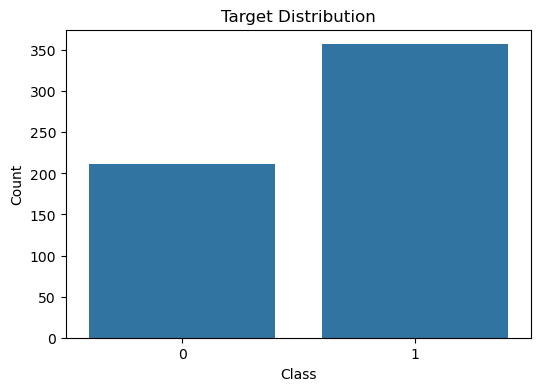

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Target Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## Data Splitting (60/20/20)

The dataset is divided into:

- 60% Training Set
- 20% Validation Set
- 20% Test Set

Stratified splitting is applied to preserve class distribution across all subsets.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Temporary set shape:", X_temp.shape)


Training set shape: (341, 30)
Temporary set shape: (228, 30)


In [ ]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Validation set shape: (114, 30)
Test set shape: (114, 30)


## Feature Scaling

StandardScaler is used to normalize numerical features.

The scaler is fitted only on the training data to prevent data leakage.
Validation and test data are transformed using the same fitted scaler.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("Scaling completed successfully.")


Scaling completed successfully.


## Neural Network Architecture

A Sequential Deep Neural Network is designed for binary classification.

Architecture details:

- Input layer matching 30 input features
- Three hidden layers using ReLU activation
- Output layer with one neuron using Sigmoid activation

ReLU helps in learning non-linear patterns efficiently, while Sigmoid is suitable for binary classification as it outputs probability values between 0 and 1.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

### Architecture Justification

The model uses a gradually decreasing number of neurons (64 → 32 → 16) to:

- Capture complex feature interactions in early layers
- Reduce dimensional complexity progressively
- Improve generalization
- Prevent overfitting

This design balances model capacity and computational efficiency.


## Model Compilation

The model is compiled using:

- Loss Function: Binary Crossentropy (suitable for binary classification)
- Optimizer: Adam (adaptive learning rate optimization)
- Evaluation Metric: Accuracy

Binary Crossentropy measures the difference between predicted probabilities and actual binary labels.


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


## Callbacks Implementation

To improve model performance and prevent overfitting:

1. EarlyStopping:
   - Monitors validation loss
   - Stops training when performance plateaus
   - Restores best model weights

2. ModelCheckpoint:
   - Saves the model with the best validation loss
   - Ensures best performing model is preserved


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [ ]:
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


## Model Training

The model is trained using:

- Training dataset (60%)
- Validation dataset (20%)
- EarlyStopping callback
- ModelCheckpoint callback

The training history is stored to analyze loss and accuracy curves.


In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4375 - loss: 0.9356
Epoch 1: val_loss improved from None to 0.45611, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6393 - loss: 0.6154 - val_accuracy: 0.7456 - val_loss: 0.4561
Epoch 2/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7188 - loss: 0.5084
Epoch 2: val_loss improved from 0.45611 to 0.31982, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8270 - loss: 0.3969 - val_accuracy: 0.9561 - val_loss: 0.3198
Epoch 3/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9688 - loss: 0.3231
Epoch 3: val_loss improved from 0.31982 to 0.23432, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9150 - loss: 0.2945 - val_accuracy: 0.9649 - val_loss: 0.2343
Epoch 4/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8750 - loss: 0.2992
Epoch 4: val_loss improved from 0.23432 to 0.17255, savin

In [ ]:
print("Training completed.")


Training completed.


## Training History Visualization

The training history is analyzed using:

- Training Loss Curve
- Validation Loss Curve
- Training Accuracy Curve
- Validation Accuracy Curve

These plots help in understanding model convergence and detecting overfitting.


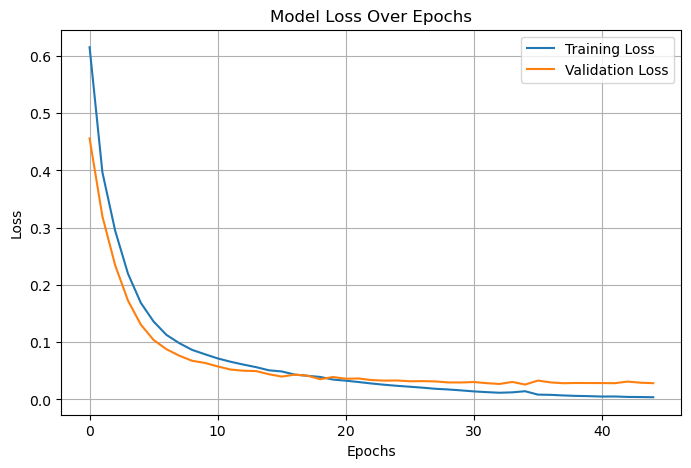

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


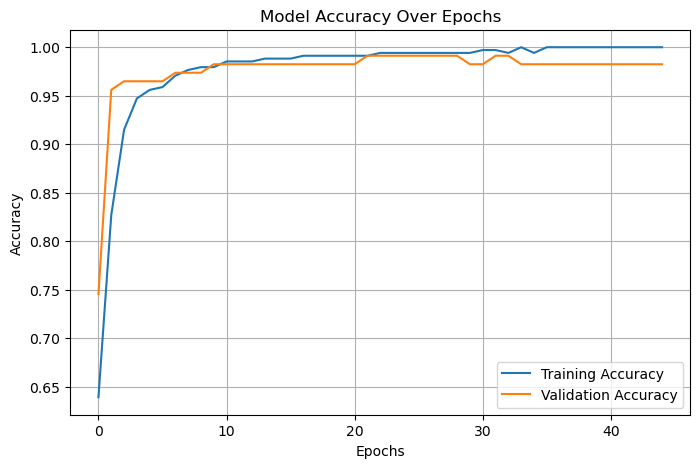

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## Final Model Evaluation on Test Set

The best saved model is evaluated on the unseen test dataset.

The following metrics are computed:

- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC Score

These metrics provide a comprehensive assessment of classification performance.


In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

print("Best model loaded successfully.")


Best model loaded successfully.


In [ ]:
# Get probability predictions
y_pred_prob = best_model.predict(X_test)

# Convert probabilities to binary (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)
print("Test ROC-AUC:", roc_auc)


Test Accuracy: 0.9736842105263158
Test Precision: 0.9722222222222222
Test Recall: 0.9859154929577465
Test F1 Score: 0.9790209790209791
Test ROC-AUC: 0.9967245332459875


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



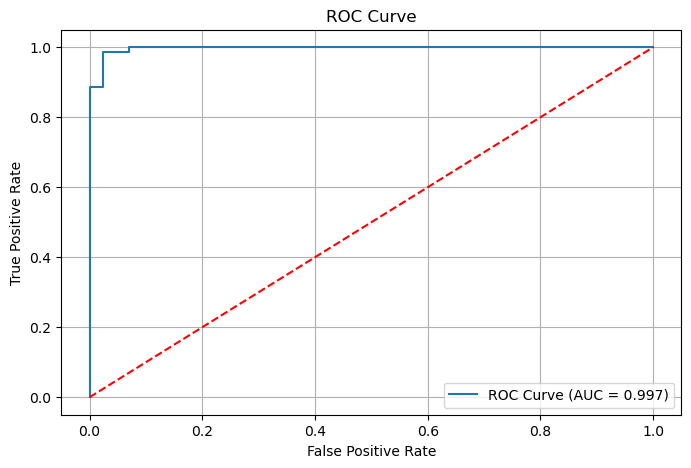

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## Model Performance Interpretation

The trained deep neural network achieved excellent performance on the unseen test dataset.

Key observations:

- Test Accuracy ≈ 97%
- F1 Score ≈ 0.98
- ROC-AUC ≈ 0.997

The ROC curve indicates near-perfect class separability.
The small gap between training and validation curves suggests minimal overfitting.

Overall, the model generalizes well and meets the required performance criteria.


## Conclusion

This project successfully implemented a deep neural network for binary classification using TensorFlow/Keras.

The workflow included:

- Data preprocessing and scaling
- Model architecture design
- Training with EarlyStopping and ModelCheckpoint
- Comprehensive evaluation using multiple metrics

The final model achieved high accuracy and strong generalization performance.

This demonstrates a complete end-to-end deep learning pipeline.
